In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
magic_gamma_telescope = fetch_ucirepo(id=159)

# data (as pandas dataframes)
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets

# metadata
print(magic_gamma_telescope.metadata)

# variable information
print(magic_gamma_telescope.variables)



{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

In [6]:
df=pd.DataFrame(X)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  
0  40.0920   81.8828  
1   6.3609  205.2610  
2  76.9600  256.7880  
3  10.4490  116.7370  
4   4.6480  356.4620

In [7]:
df['class']=y
df['class'].unique()

array(['g', 'h'], dtype=object)

In [8]:
df["class"]=(df["class"]=='g').astype(int)

In [9]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

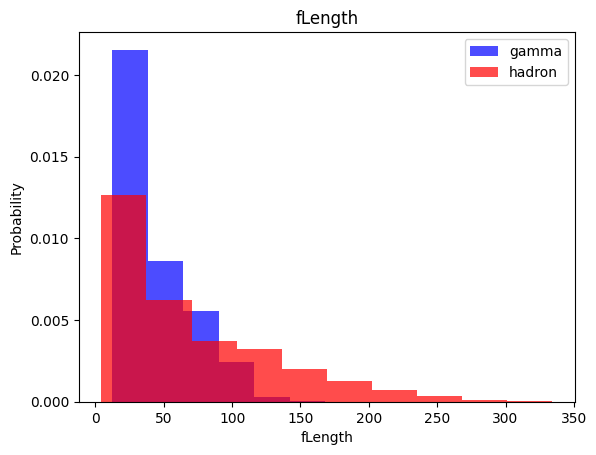

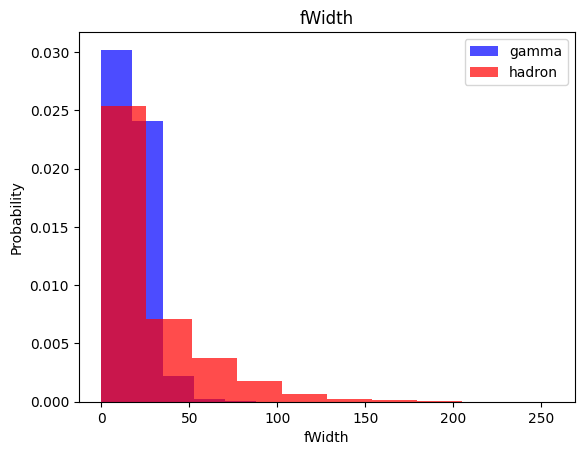

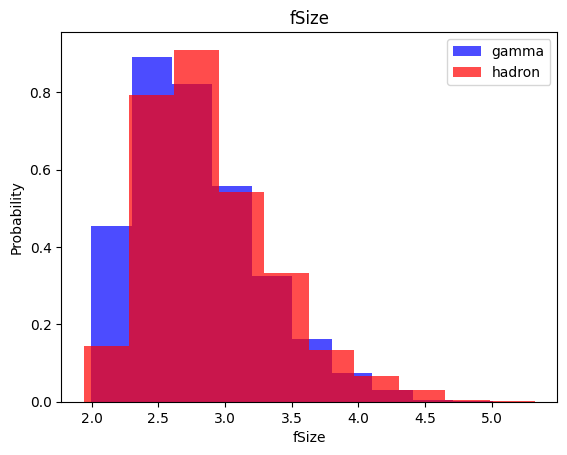

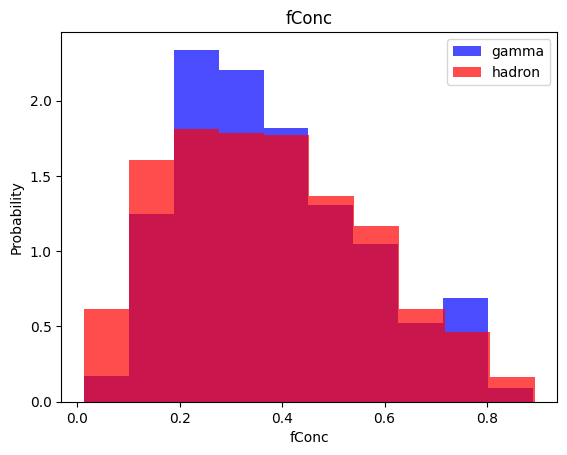

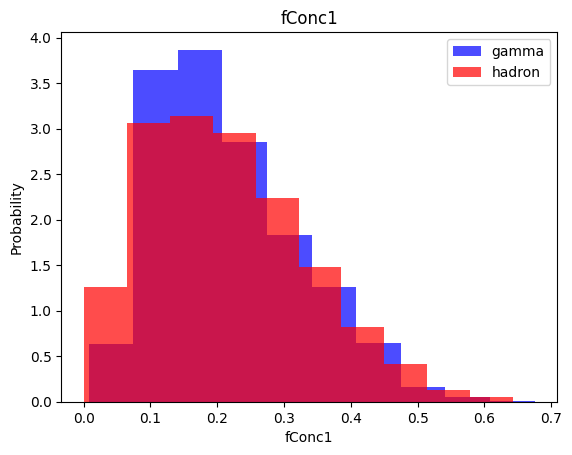

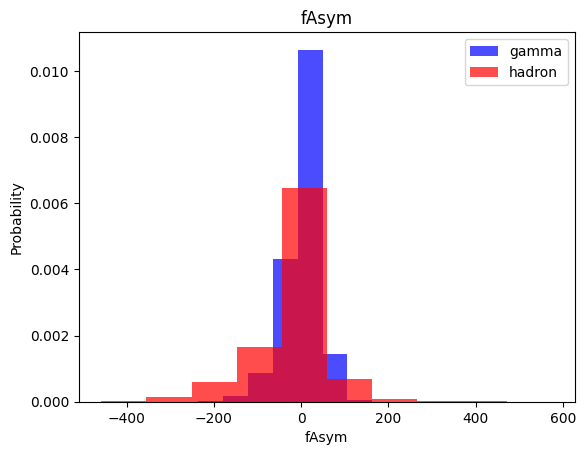

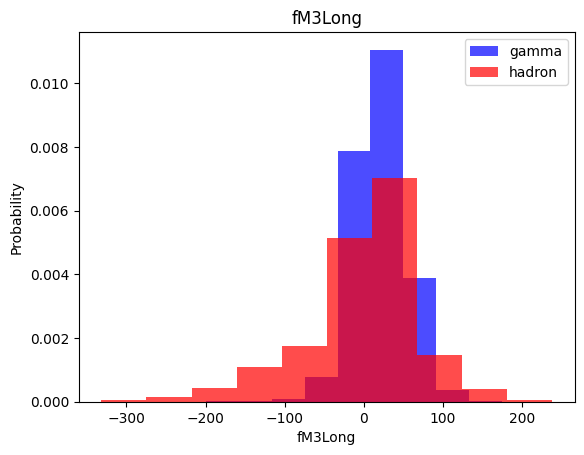

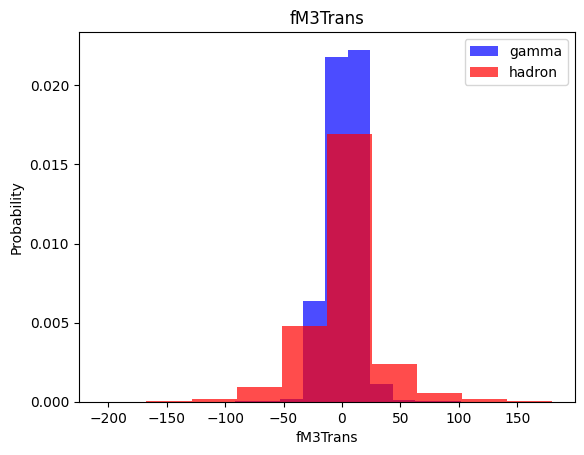

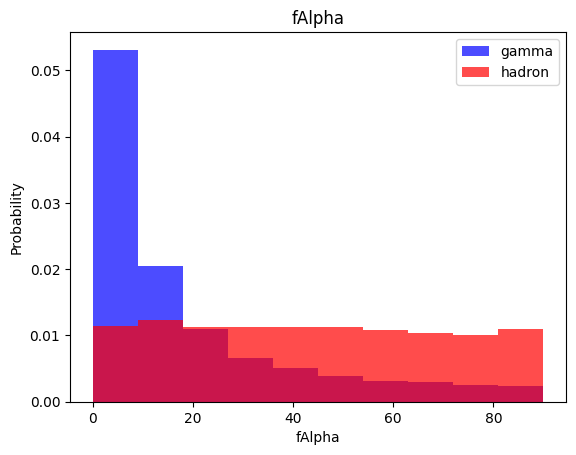

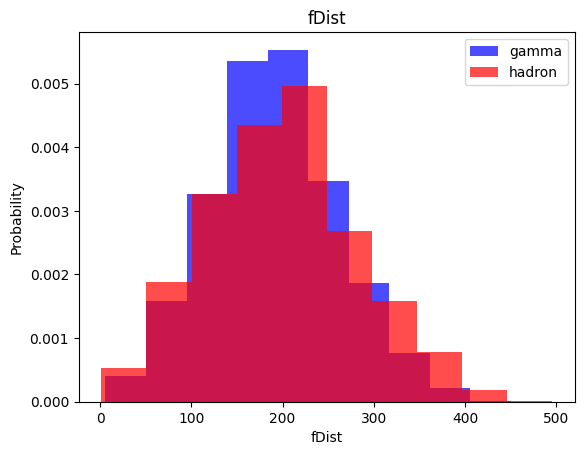

In [10]:
for label in df.columns[:-1]:
    plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [11]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:
from sklearn.preprocessing import StandardScaler

def scale_dataset(df, oversample=False):
  X=df[df.columns[:-1]].values
  y=df[df.columns[-1]].values
  scaler=StandardScaler()
  X=scaler.fit_transform(X)
  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data=np.hstack((X, np.reshape(y, (-1,1))))
  return data

In [13]:
train

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
17303   31.5307  19.0776  2.5934  0.3967  0.2105   4.8405 -19.6776   -5.0824   
13494  104.9720  61.6853  3.4451  0.1396  0.0712  -1.5046  78.2005   37.4677   
2373    93.6117  25.9597  3.7458  0.1578  0.0929 -92.3861  82.0158  -14.8940   
14184   33.2179  17.2895  2.5063  0.3848  0.2086  30.3863   3.5910  -24.2987   
4818    29.9042  22.6803  2.9031  0.2562  0.1319   7.8367 -14.9016  -15.0364   
...         ...      ...     ...     ...     ...      ...      ...       ...   
12010   60.9973  14.2755  2.4914  0.4161  0.2403 -86.3971  43.9230   -3.1255   
11699   34.2994  17.4800  2.8831  0.3390  0.1774   1.5319  24.3802   -7.8308   
16754   22.0457  17.5449  2.5514  0.3477  0.2139   1.4042   9.2822   10.1379   
14323   29.1553  20.7816  2.6309  0.4117  0.2164  16.5963  27.0022  -13.5072   
5356    18.0191  10.7403  2.1492  0.5532  0.2943  -0.9864   6.4750    5.0852   

        fAlpha     fDist  class  
17303   4.3498  173.0274      0  
13494  10.3810  183.4860      0  
2373    1.4092  269.3360      1  
14184  42.1742  210.5265      0  
4818   27.1910  116.1860      1  
...        ...       ...    ...  
12010   5.0810  255.5410      1  
11699  11.1759  185.6240      1  
16754  22.7692  204.2845      0  
14323  56.5410  103.2430      0  
5356   43.1880  285.0590      1  

[11412 rows x 11 columns]

In [14]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(train[train.columns[:-1]], train[train.columns[-1]])

In [15]:
# Modified code for ipython-input-35-51df2ea4bb13
# Original:
# train, x_train, y_train = scale_dataset(train, oversample=True)
# valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
# test, x_test, y_test = scale_dataset(test, oversample=False)


# Updated code:
train_data = scale_dataset(train, oversample=True)
valid_data = scale_dataset(valid, oversample=False)
test_data = scale_dataset(test, oversample=False)

# Extracting X and y from the returned data
x_train = train_data[:, :-1]  # Select all columns except the last one
y_train = train_data[:, -1]   # Select only the last column
x_valid = valid_data[:, :-1]
y_valid = valid_data[:, -1]
x_test = test_data[:, :-1]
y_test = test_data[:, -1]

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
y_pred = knn_model.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.67      0.72      1334
         1.0       0.83      0.89      0.86      2470

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [19]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model=nb_model.fit(x_train, y_train)

In [20]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.39      0.49      1334
         1.0       0.73      0.89      0.80      2470

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804



In [21]:
from sklearn.linear_model import LogisticRegression

lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train, y_train)

In [22]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.71      0.70      1334
         1.0       0.84      0.82      0.83      2470

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [23]:
from sklearn.svm import SVC

svm_model=SVC()
svm_model=svm_model.fit(x_train, y_train)

In [24]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81      1334
         1.0       0.89      0.90      0.90      2470

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [25]:
def plot_history(history):
    fig, (ax1,ax2)= plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.grid(True)

    plt.show()



In [26]:
import tensorflow as tf

def train_model(x_train, y_train, num_node,lr, batch_size, epochs):
  inputs = tf.keras.Input(shape=(10,))
  nn_model= tf.keras.Sequential([
      inputs,
      tf.keras.layers.Dense(num_node, activation='relu',),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_node, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history=nn_model.fit(x_train, y_train, batch_size=batch_size,verbose=0, epochs=epochs, validation_split=0.2)
  return nn_model, history

num_node=32
dropout_prob=0.2
lr=0.001
batch_size=32
epochs=10

nn_model, history=train_model(x_train, y_train, num_node, lr, batch_size, epochs)

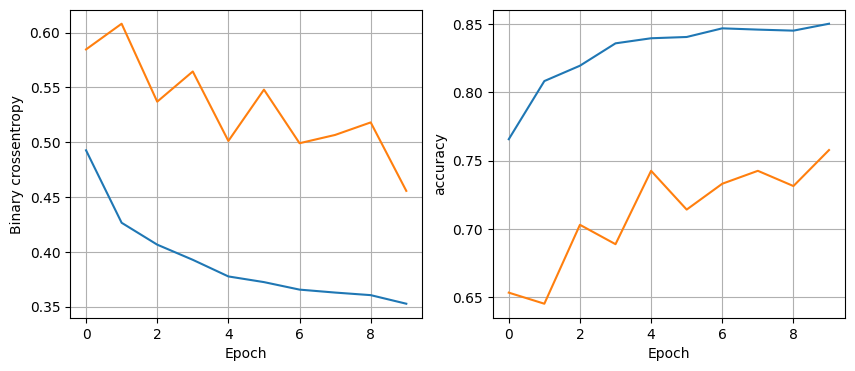

In [27]:
plot_history(history)

Treinando com num_node: 32, dropout_prob: 0, lr: 0.01, batch_size: 32


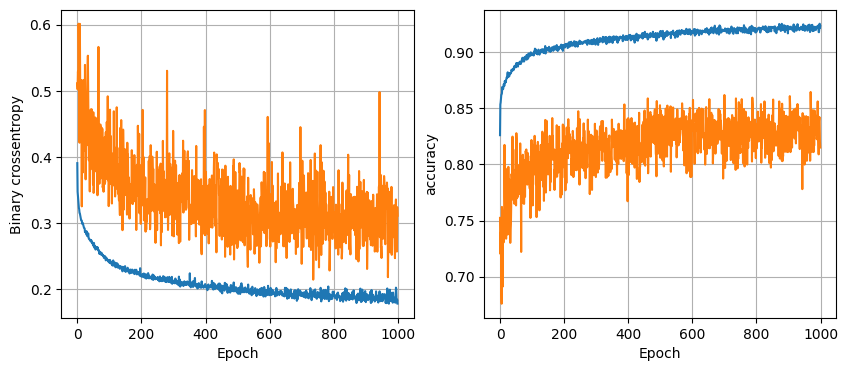

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8562 - loss: 0.8185
Val_loss: 0.8505963087081909 para num_node: 32, dropout_prob: 0, lr: 0.01, batch_size: 32
Treinando com num_node: 32, dropout_prob: 0, lr: 0.01, batch_size: 64


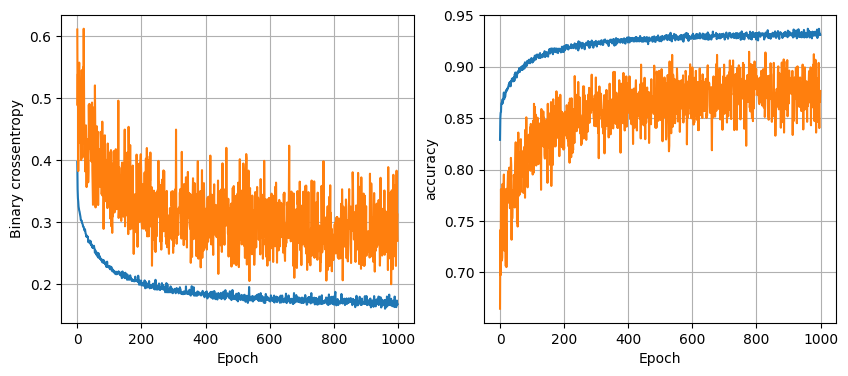

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8412 - loss: 0.7985
Val_loss: 0.7225841879844666 para num_node: 32, dropout_prob: 0, lr: 0.01, batch_size: 64
Treinando com num_node: 32, dropout_prob: 0, lr: 0.01, batch_size: 128


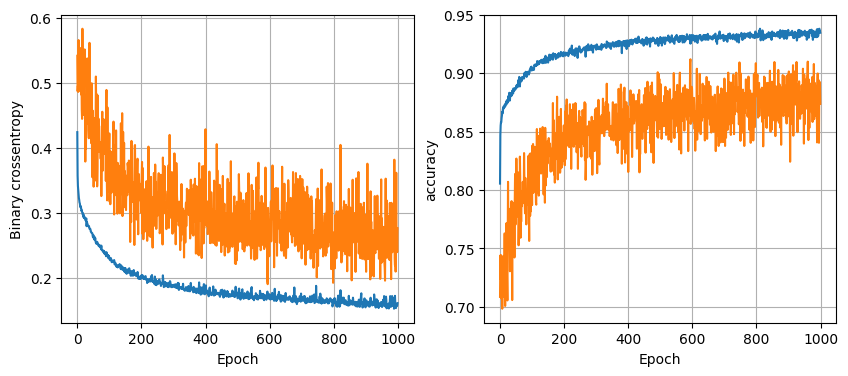

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8512 - loss: 0.6646
Val_loss: 0.6825265884399414 para num_node: 32, dropout_prob: 0, lr: 0.01, batch_size: 128
Treinando com num_node: 32, dropout_prob: 0, lr: 0.005, batch_size: 32


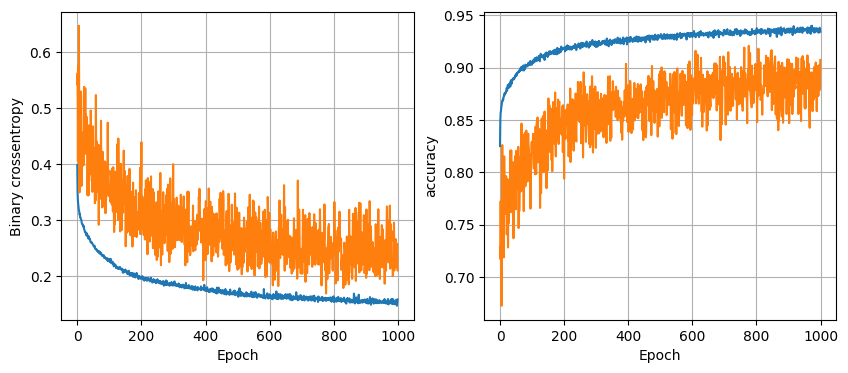

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8351 - loss: 0.7340
Val_loss: 0.6965637803077698 para num_node: 32, dropout_prob: 0, lr: 0.005, batch_size: 32
Treinando com num_node: 32, dropout_prob: 0, lr: 0.005, batch_size: 64


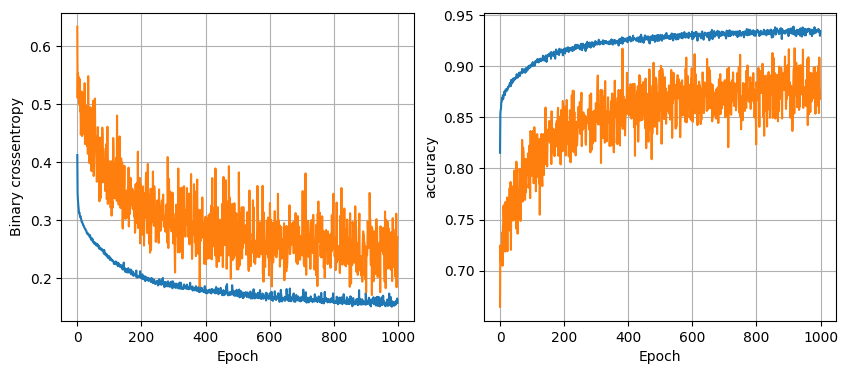

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8449 - loss: 0.7011
Val_loss: 0.7028437256813049 para num_node: 32, dropout_prob: 0, lr: 0.005, batch_size: 64
Treinando com num_node: 32, dropout_prob: 0, lr: 0.005, batch_size: 128


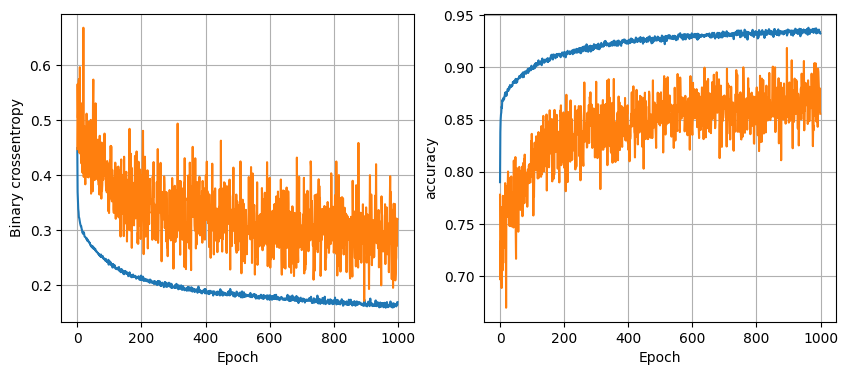

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8520 - loss: 0.5606
Val_loss: 0.5735227465629578 para num_node: 32, dropout_prob: 0, lr: 0.005, batch_size: 128
Treinando com num_node: 32, dropout_prob: 0, lr: 0.0001, batch_size: 32


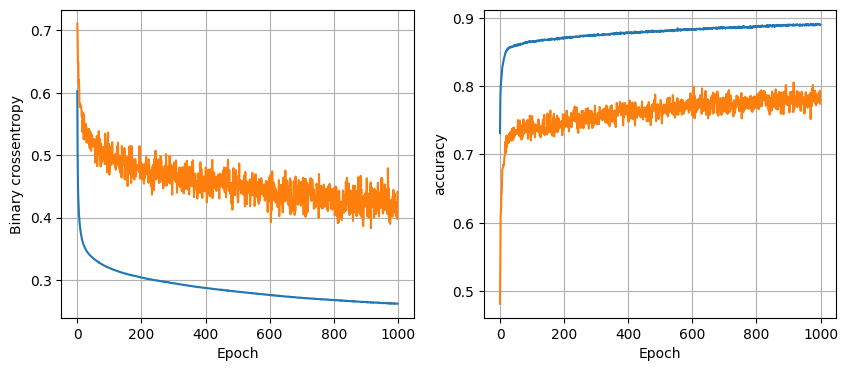

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8837 - loss: 0.2893
Val_loss: 0.30773213505744934 para num_node: 32, dropout_prob: 0, lr: 0.0001, batch_size: 32
Treinando com num_node: 32, dropout_prob: 0, lr: 0.0001, batch_size: 64


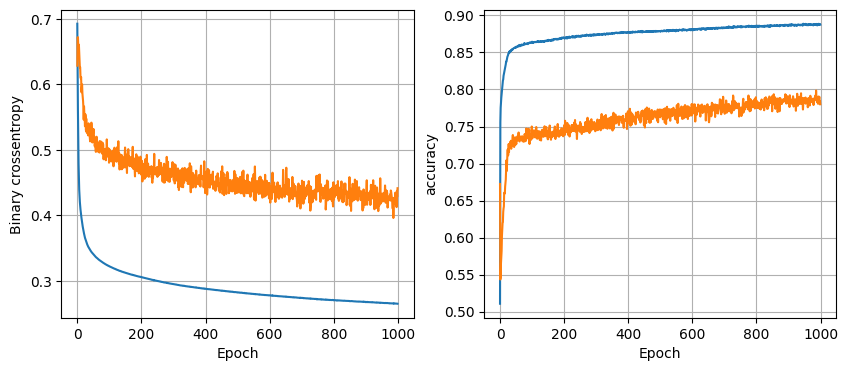

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8803 - loss: 0.2898
Val_loss: 0.3109130263328552 para num_node: 32, dropout_prob: 0, lr: 0.0001, batch_size: 64
Treinando com num_node: 32, dropout_prob: 0, lr: 0.0001, batch_size: 128


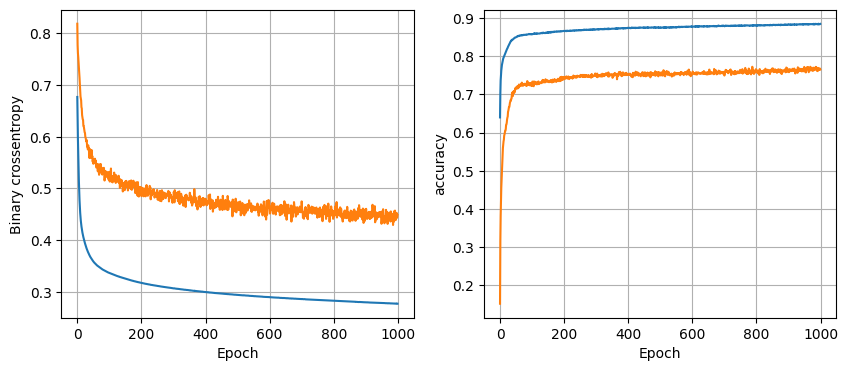

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8835 - loss: 0.2839
Val_loss: 0.30110591650009155 para num_node: 32, dropout_prob: 0, lr: 0.0001, batch_size: 128
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 32


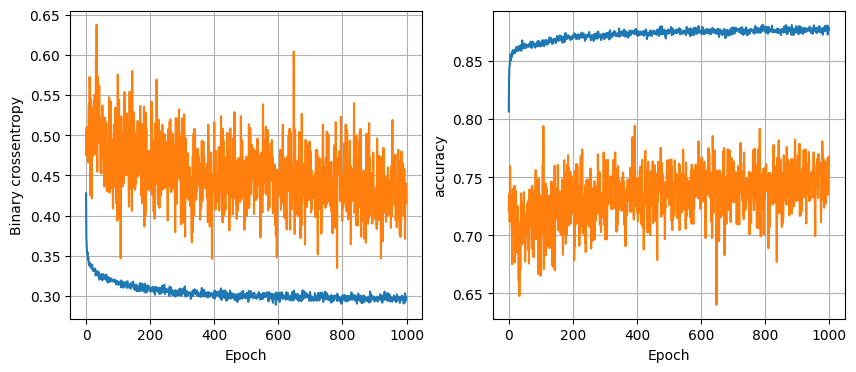

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.3623
Val_loss: 0.3418601453304291 para num_node: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 32
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 64


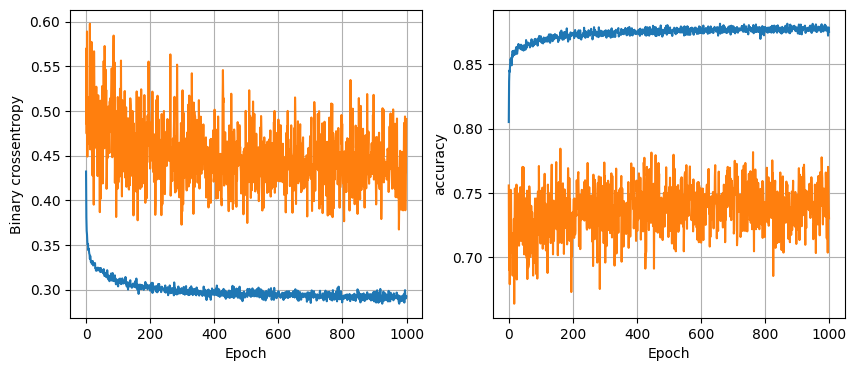

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8767 - loss: 0.2921
Val_loss: 0.31062862277030945 para num_node: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 64
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 128


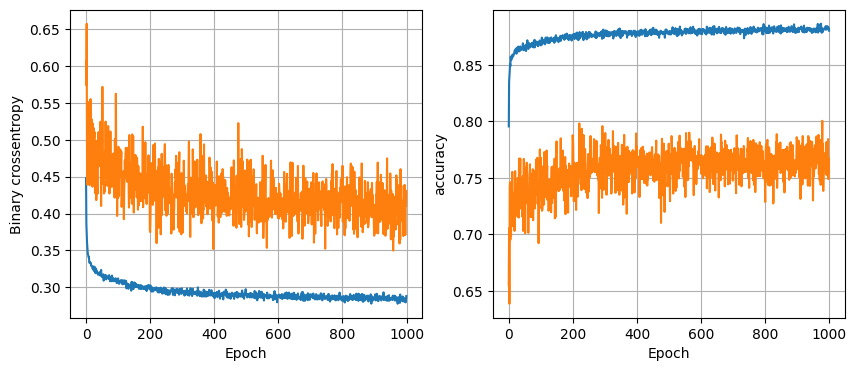

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8736 - loss: 0.2923
Val_loss: 0.30876684188842773 para num_node: 32, dropout_prob: 0.2, lr: 0.01, batch_size: 128
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 32


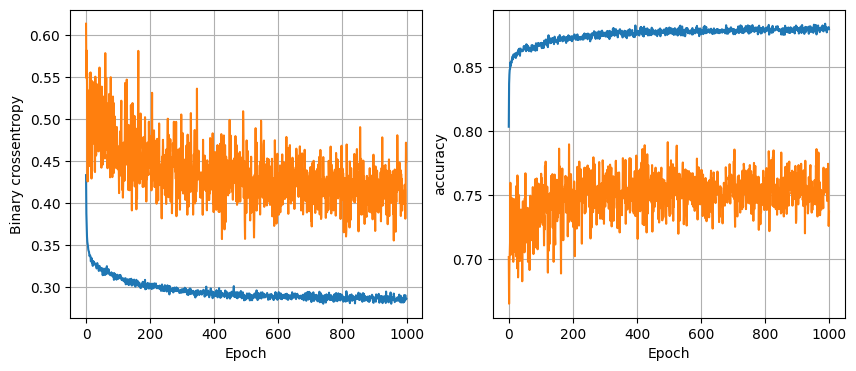

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8826 - loss: 0.2884
Val_loss: 0.3018777072429657 para num_node: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 32
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 64


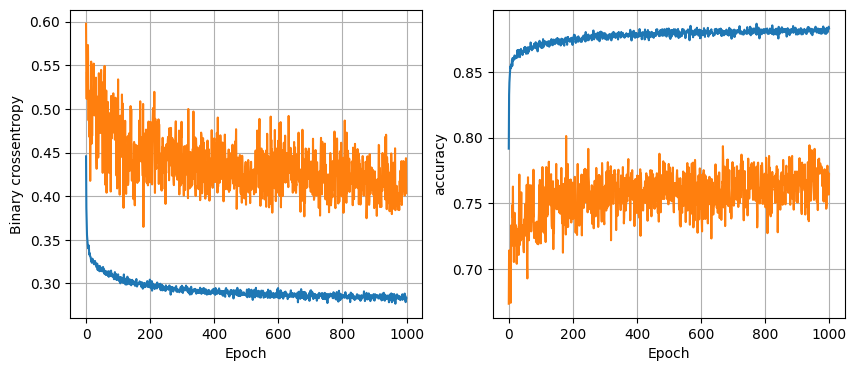

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8809 - loss: 0.2922
Val_loss: 0.3100013732910156 para num_node: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 64
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 128


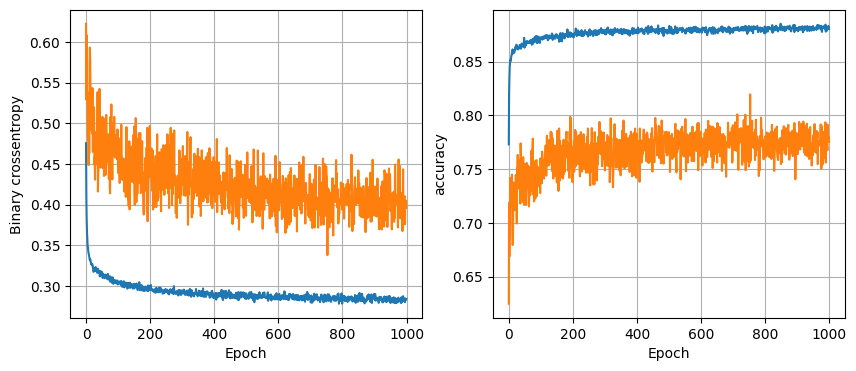

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8802 - loss: 0.2813
Val_loss: 0.29531458020210266 para num_node: 32, dropout_prob: 0.2, lr: 0.005, batch_size: 128
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.0001, batch_size: 32


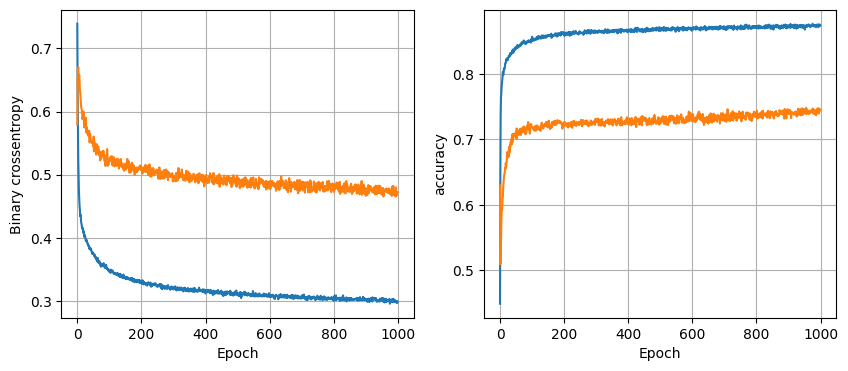

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8860 - loss: 0.2781
Val_loss: 0.2936003804206848 para num_node: 32, dropout_prob: 0.2, lr: 0.0001, batch_size: 32
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.0001, batch_size: 64


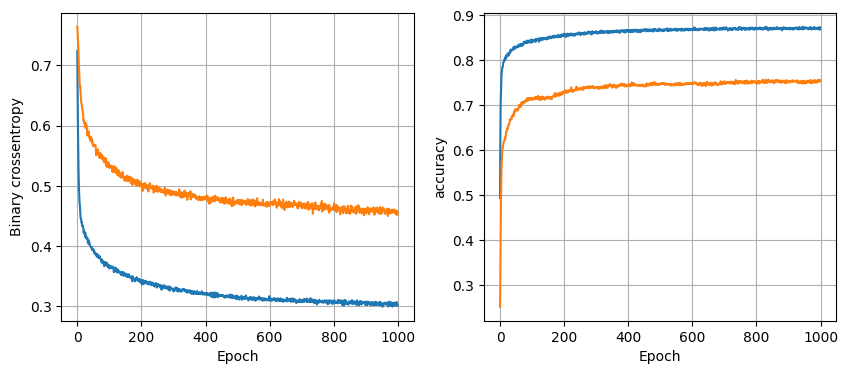

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8861 - loss: 0.2770
Val_loss: 0.293152779340744 para num_node: 32, dropout_prob: 0.2, lr: 0.0001, batch_size: 64
Treinando com num_node: 32, dropout_prob: 0.2, lr: 0.0001, batch_size: 128


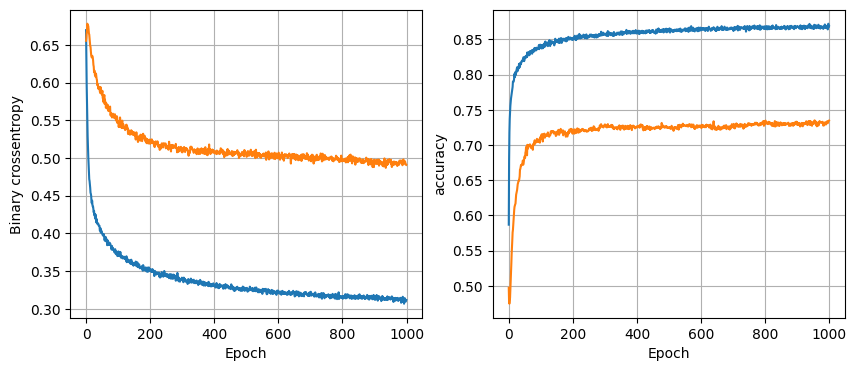

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8844 - loss: 0.2801
Val_loss: 0.29643842577934265 para num_node: 32, dropout_prob: 0.2, lr: 0.0001, batch_size: 128
Treinando com num_node: 64, dropout_prob: 0, lr: 0.01, batch_size: 32


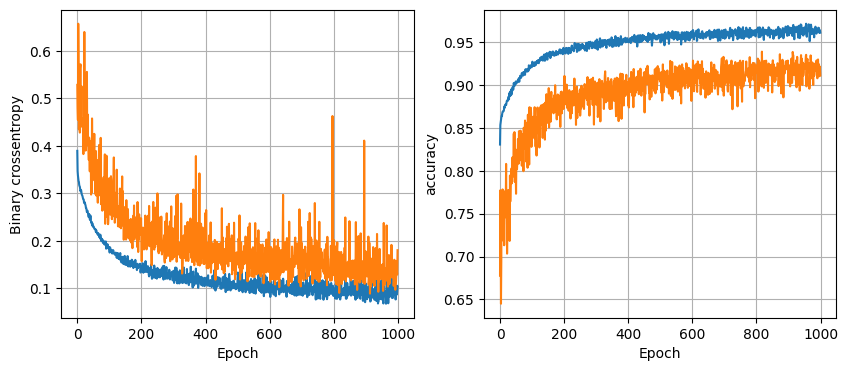

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8453 - loss: 2.0669
Val_loss: 1.9924118518829346 para num_node: 64, dropout_prob: 0, lr: 0.01, batch_size: 32
Treinando com num_node: 64, dropout_prob: 0, lr: 0.01, batch_size: 64


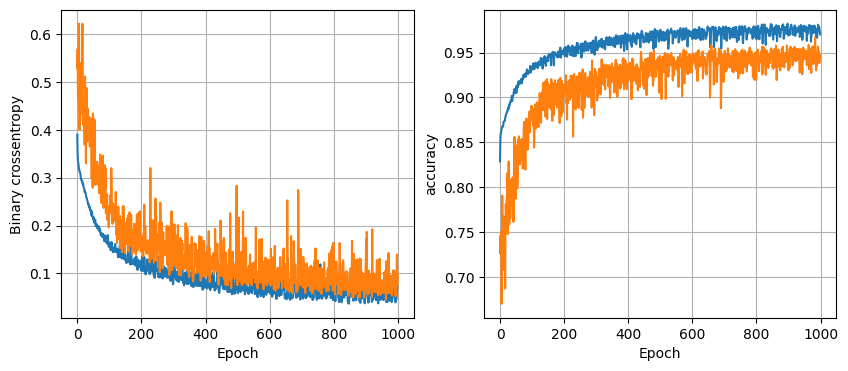

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8356 - loss: 2.3097
Val_loss: 2.464874744415283 para num_node: 64, dropout_prob: 0, lr: 0.01, batch_size: 64
Treinando com num_node: 64, dropout_prob: 0, lr: 0.01, batch_size: 128


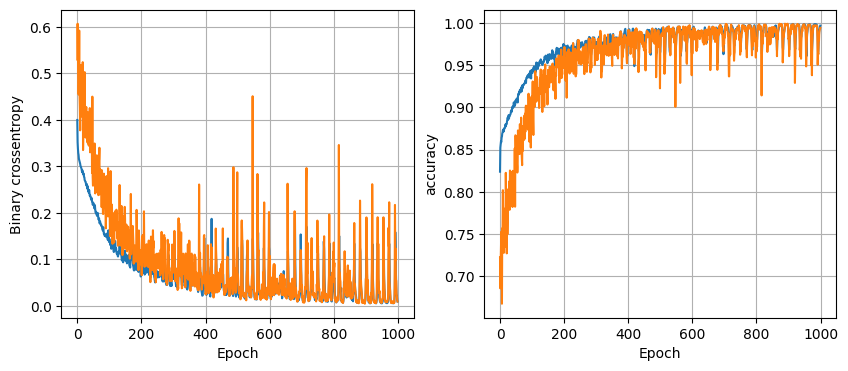

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8405 - loss: 2.1330
Val_loss: 2.1018292903900146 para num_node: 64, dropout_prob: 0, lr: 0.01, batch_size: 128
Treinando com num_node: 64, dropout_prob: 0, lr: 0.005, batch_size: 32


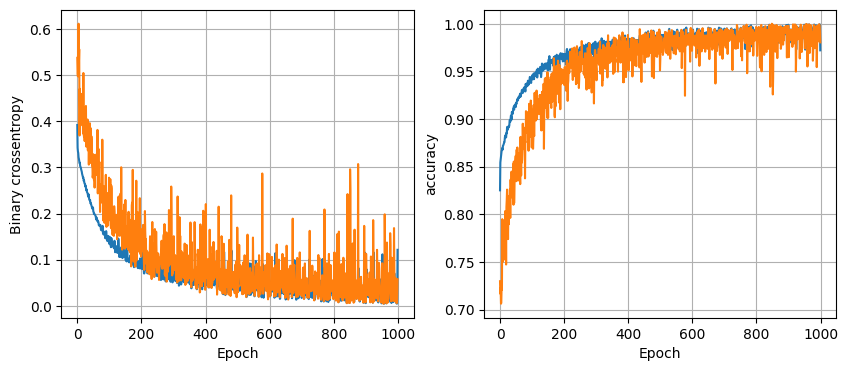

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8440 - loss: 2.7406
Val_loss: 2.594489336013794 para num_node: 64, dropout_prob: 0, lr: 0.005, batch_size: 32
Treinando com num_node: 64, dropout_prob: 0, lr: 0.005, batch_size: 64


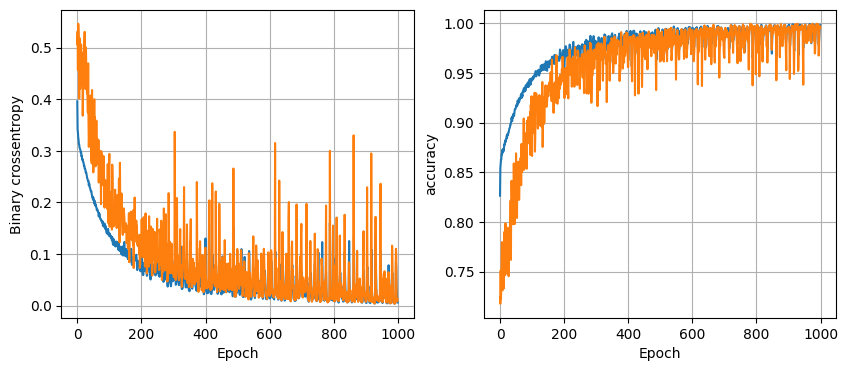

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8372 - loss: 2.7804
Val_loss: 2.6817400455474854 para num_node: 64, dropout_prob: 0, lr: 0.005, batch_size: 64
Treinando com num_node: 64, dropout_prob: 0, lr: 0.005, batch_size: 128


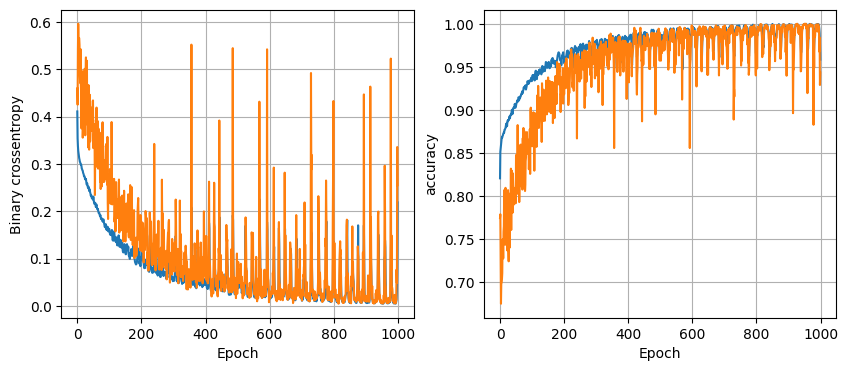

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8442 - loss: 2.5399
Val_loss: 2.483888864517212 para num_node: 64, dropout_prob: 0, lr: 0.005, batch_size: 128
Treinando com num_node: 64, dropout_prob: 0, lr: 0.0001, batch_size: 32


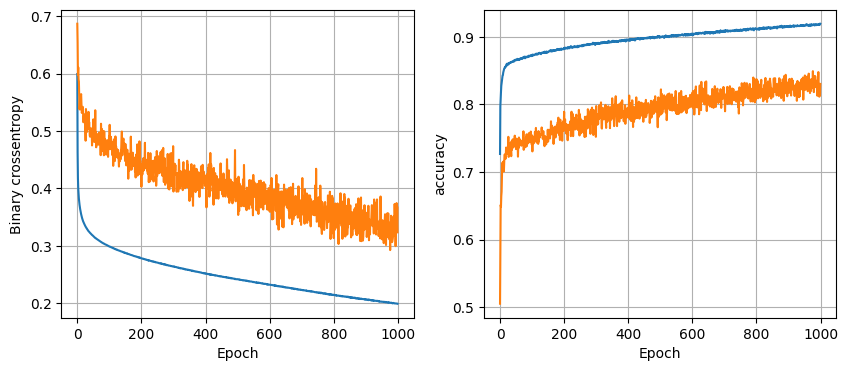

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8698 - loss: 0.3337
Val_loss: 0.34614232182502747 para num_node: 64, dropout_prob: 0, lr: 0.0001, batch_size: 32
Treinando com num_node: 64, dropout_prob: 0, lr: 0.0001, batch_size: 64


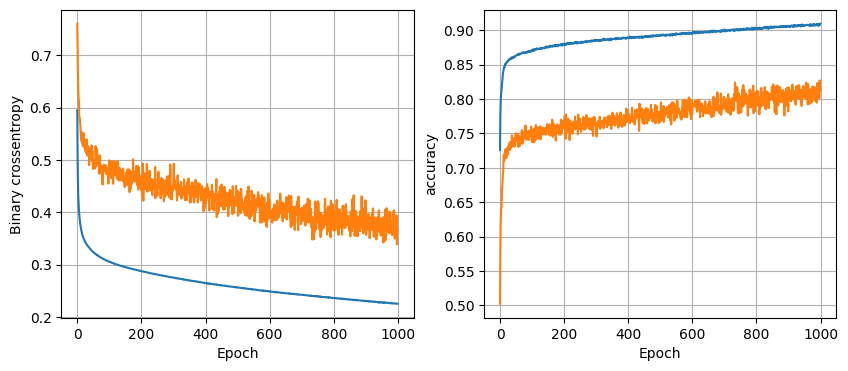

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8833 - loss: 0.3005
Val_loss: 0.31593507528305054 para num_node: 64, dropout_prob: 0, lr: 0.0001, batch_size: 64
Treinando com num_node: 64, dropout_prob: 0, lr: 0.0001, batch_size: 128


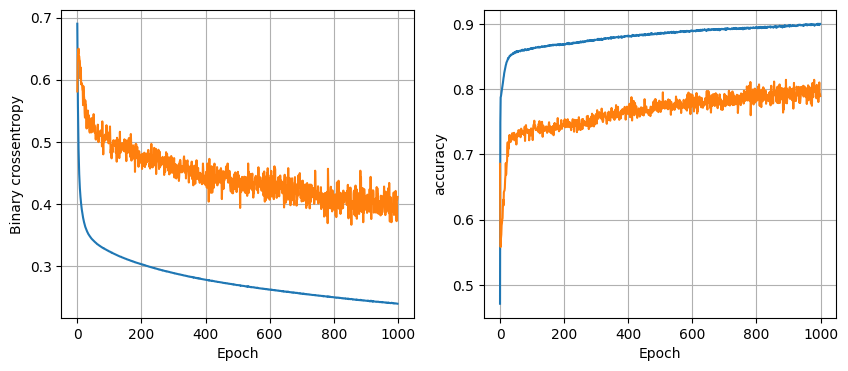

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8806 - loss: 0.2982
Val_loss: 0.3143213093280792 para num_node: 64, dropout_prob: 0, lr: 0.0001, batch_size: 128
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 32


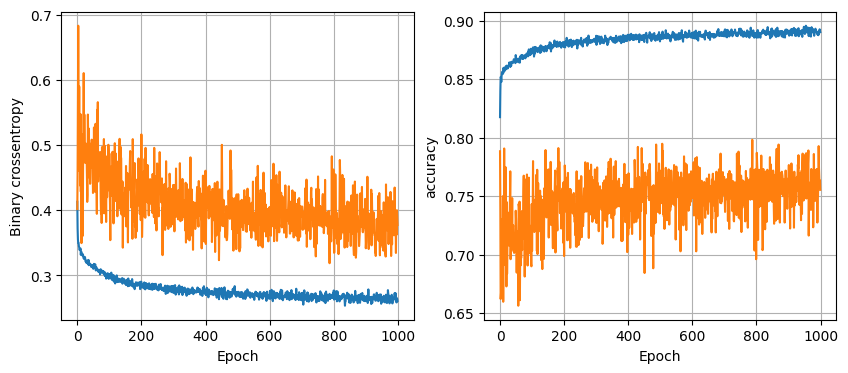

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8782 - loss: 0.4313
Val_loss: 0.4016377031803131 para num_node: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 32
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 64


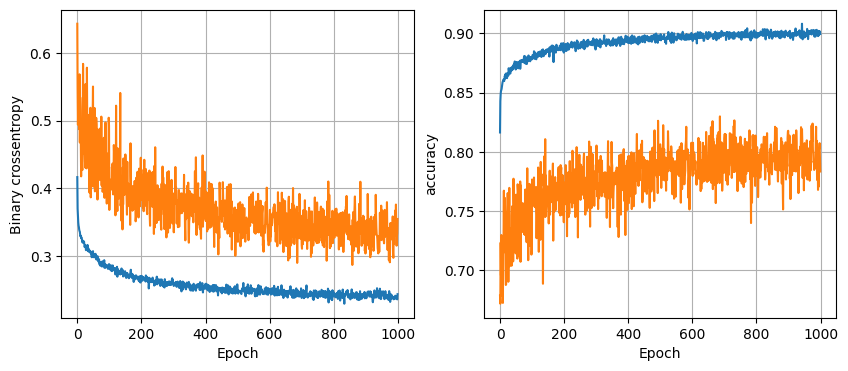

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8730 - loss: 0.3132
Val_loss: 0.3263142704963684 para num_node: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 64
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 128


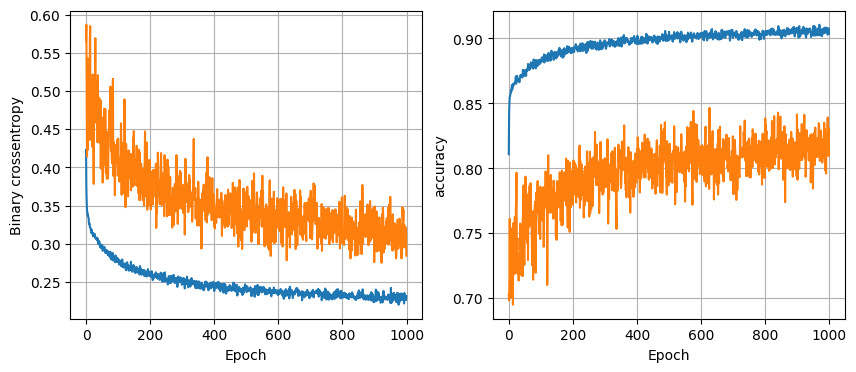

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8828 - loss: 0.3206
Val_loss: 0.335119366645813 para num_node: 64, dropout_prob: 0.2, lr: 0.01, batch_size: 128
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 32


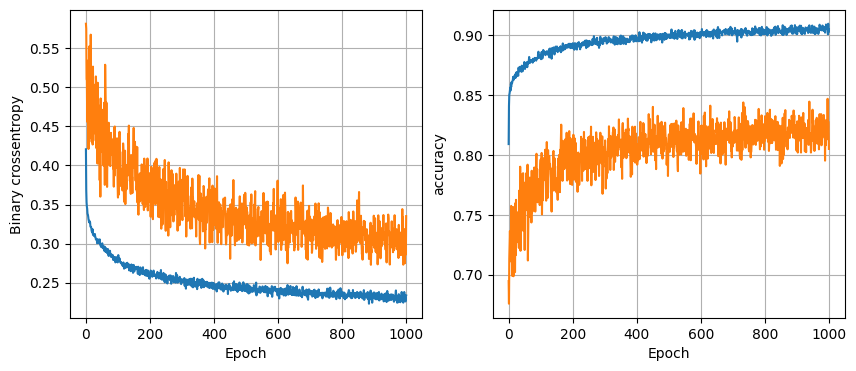

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8867 - loss: 0.3104
Val_loss: 0.33539897203445435 para num_node: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 32
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 64


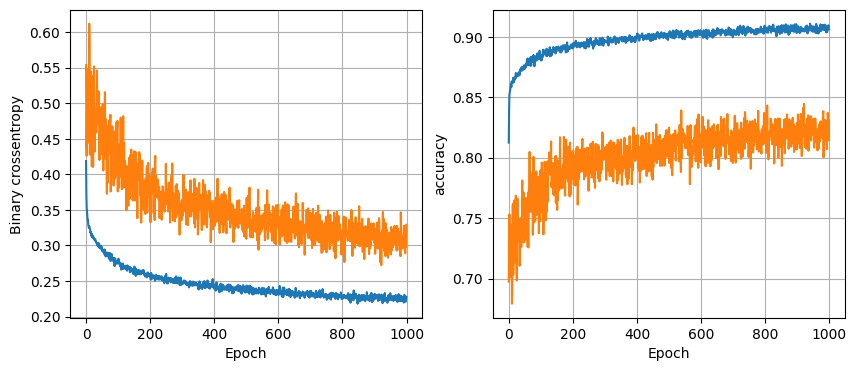

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8766 - loss: 0.3053
Val_loss: 0.3182430565357208 para num_node: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 64
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 128


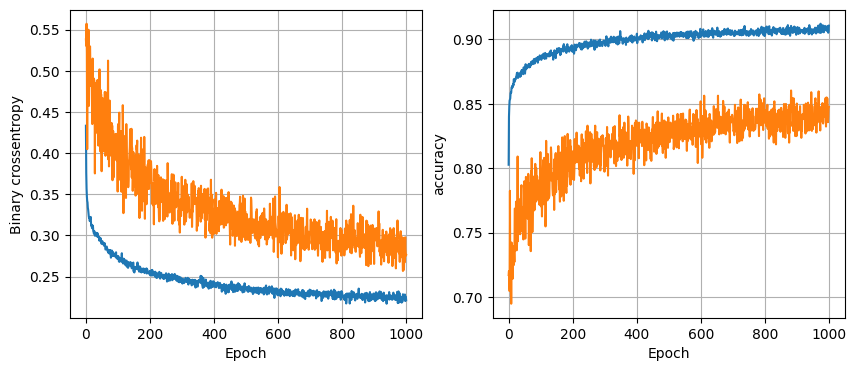

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8764 - loss: 0.3157
Val_loss: 0.3237679600715637 para num_node: 64, dropout_prob: 0.2, lr: 0.005, batch_size: 128
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.0001, batch_size: 32


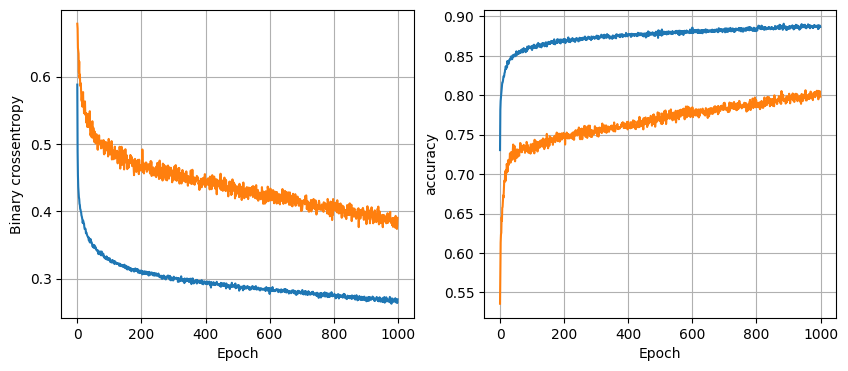

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8873 - loss: 0.2722
Val_loss: 0.2885480225086212 para num_node: 64, dropout_prob: 0.2, lr: 0.0001, batch_size: 32
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.0001, batch_size: 64


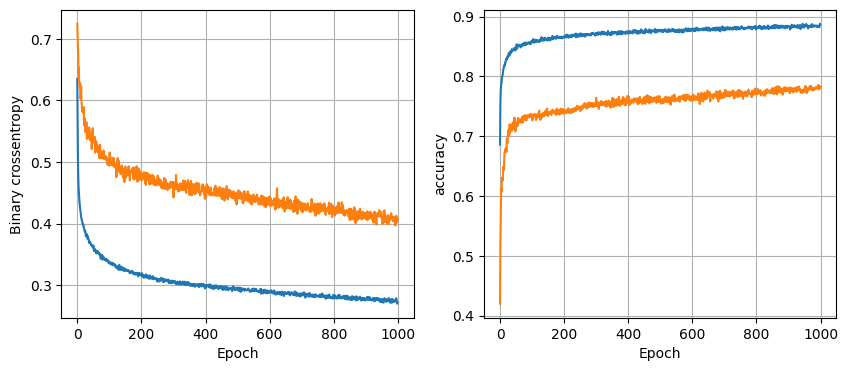

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8861 - loss: 0.2727
Val_loss: 0.2877577543258667 para num_node: 64, dropout_prob: 0.2, lr: 0.0001, batch_size: 64
Treinando com num_node: 64, dropout_prob: 0.2, lr: 0.0001, batch_size: 128


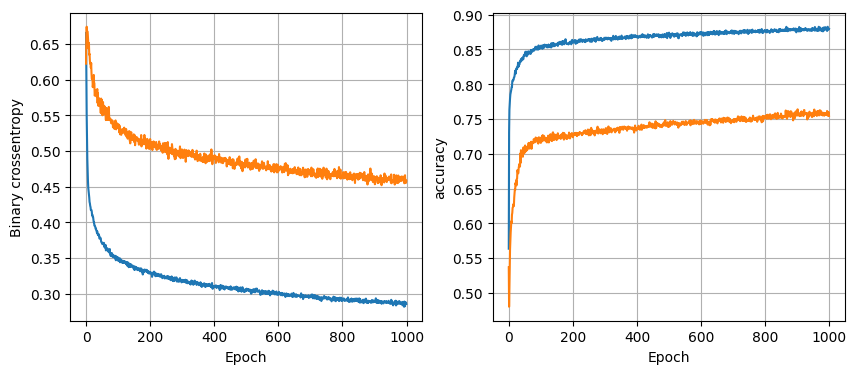

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8888 - loss: 0.2719
Val_loss: 0.28747668862342834 para num_node: 64, dropout_prob: 0.2, lr: 0.0001, batch_size: 128
Treinando com num_node: 128, dropout_prob: 0, lr: 0.01, batch_size: 32


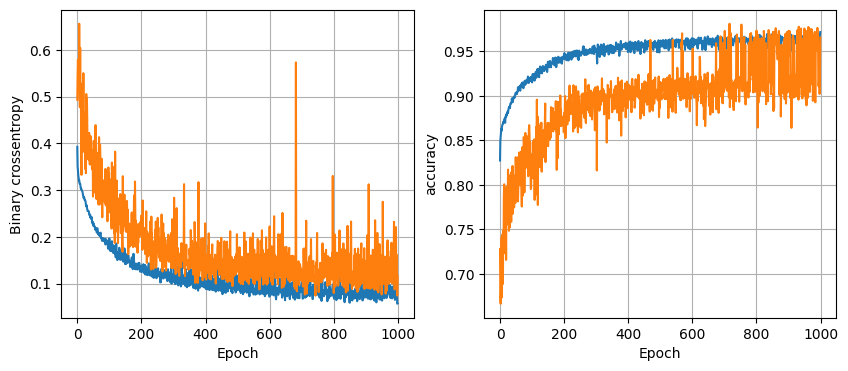

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8529 - loss: 2.8228
Val_loss: 2.6267783641815186 para num_node: 128, dropout_prob: 0, lr: 0.01, batch_size: 32
Treinando com num_node: 128, dropout_prob: 0, lr: 0.01, batch_size: 64


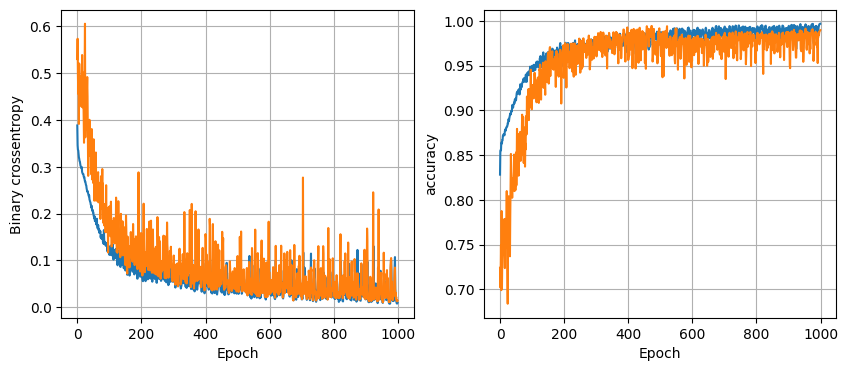

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8491 - loss: 2.9933
Val_loss: 2.838560104370117 para num_node: 128, dropout_prob: 0, lr: 0.01, batch_size: 64
Treinando com num_node: 128, dropout_prob: 0, lr: 0.01, batch_size: 128


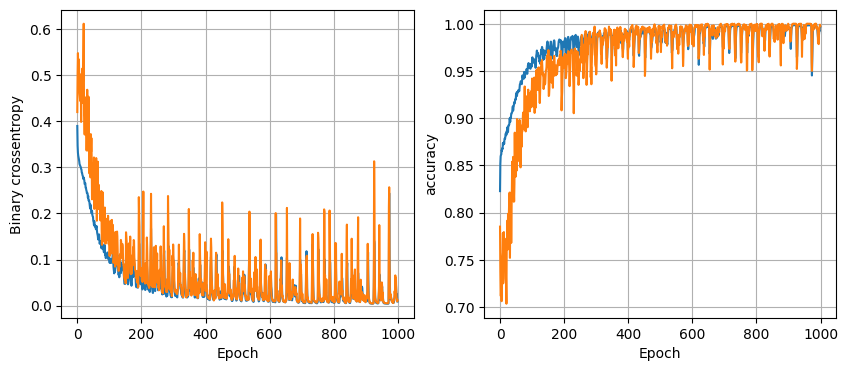

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8396 - loss: 2.8118
Val_loss: 2.555840253829956 para num_node: 128, dropout_prob: 0, lr: 0.01, batch_size: 128
Treinando com num_node: 128, dropout_prob: 0, lr: 0.005, batch_size: 32


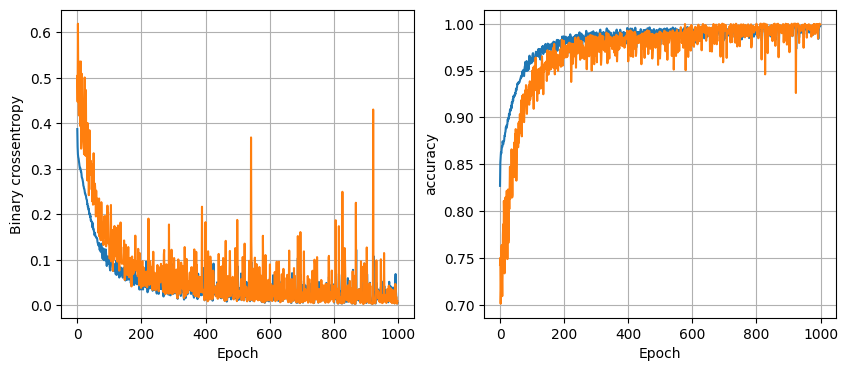

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8406 - loss: 2.6616
Val_loss: 2.8342270851135254 para num_node: 128, dropout_prob: 0, lr: 0.005, batch_size: 32
Treinando com num_node: 128, dropout_prob: 0, lr: 0.005, batch_size: 64


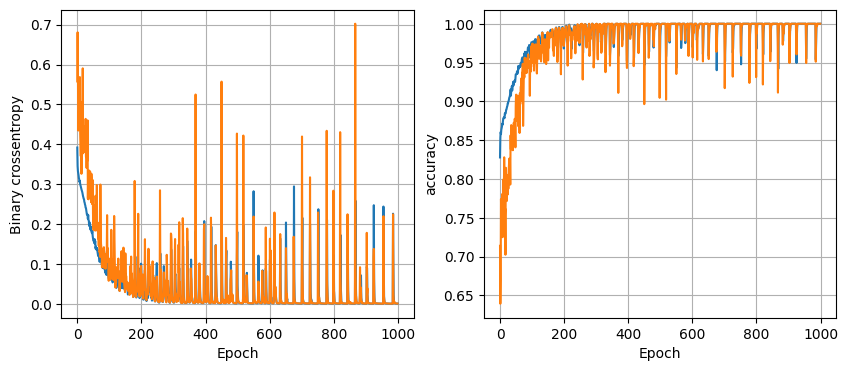

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8409 - loss: 2.0234
Val_loss: 1.9878284931182861 para num_node: 128, dropout_prob: 0, lr: 0.005, batch_size: 64
Treinando com num_node: 128, dropout_prob: 0, lr: 0.005, batch_size: 128


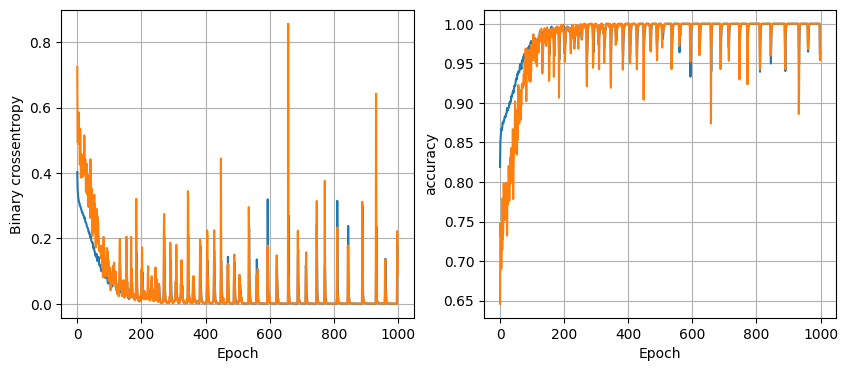

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8436 - loss: 1.6454
Val_loss: 1.689916729927063 para num_node: 128, dropout_prob: 0, lr: 0.005, batch_size: 128
Treinando com num_node: 128, dropout_prob: 0, lr: 0.0001, batch_size: 32


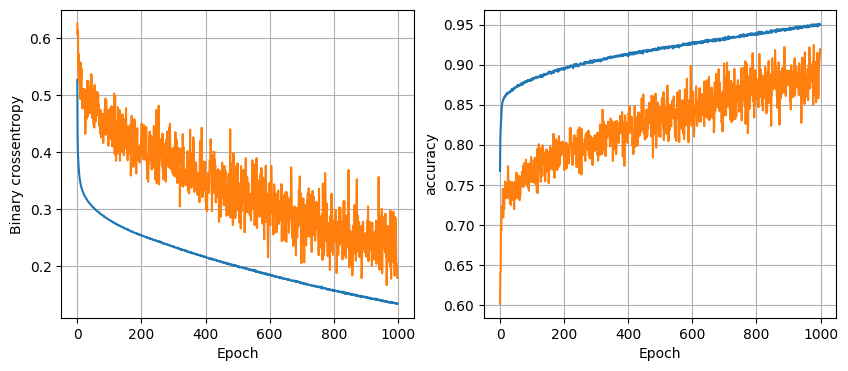

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8491 - loss: 0.3980
Val_loss: 0.4163500666618347 para num_node: 128, dropout_prob: 0, lr: 0.0001, batch_size: 32
Treinando com num_node: 128, dropout_prob: 0, lr: 0.0001, batch_size: 64


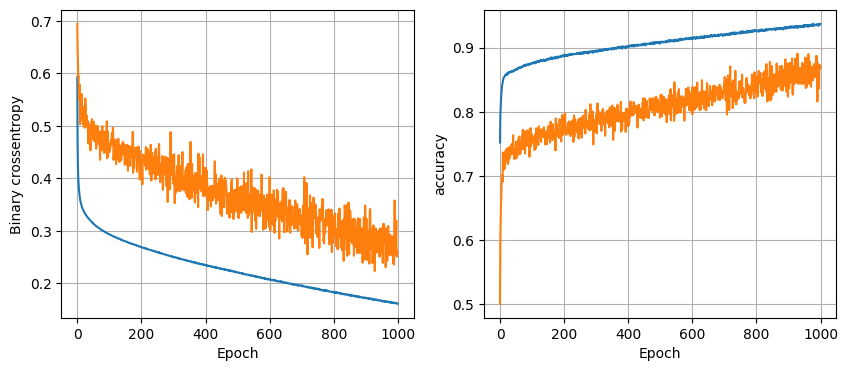

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8636 - loss: 0.3455
Val_loss: 0.3591698408126831 para num_node: 128, dropout_prob: 0, lr: 0.0001, batch_size: 64
Treinando com num_node: 128, dropout_prob: 0, lr: 0.0001, batch_size: 128


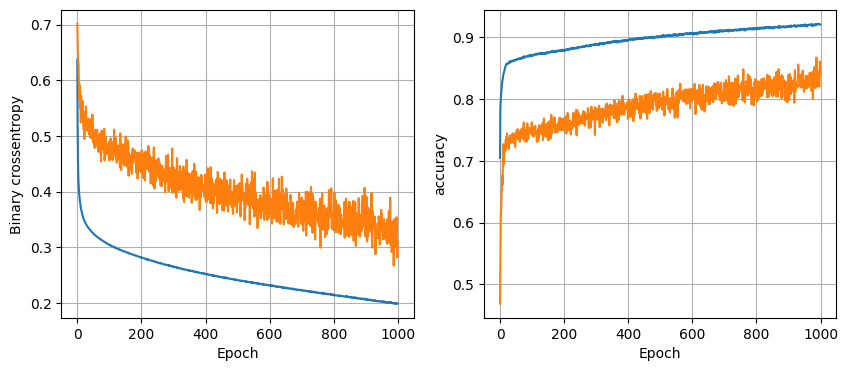

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.3191
Val_loss: 0.33770066499710083 para num_node: 128, dropout_prob: 0, lr: 0.0001, batch_size: 128
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 32


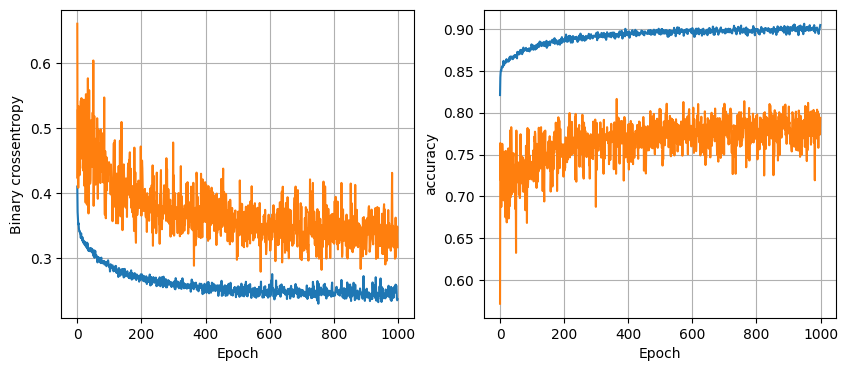

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8825 - loss: 0.7573
Val_loss: 0.6791345477104187 para num_node: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 32
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 64


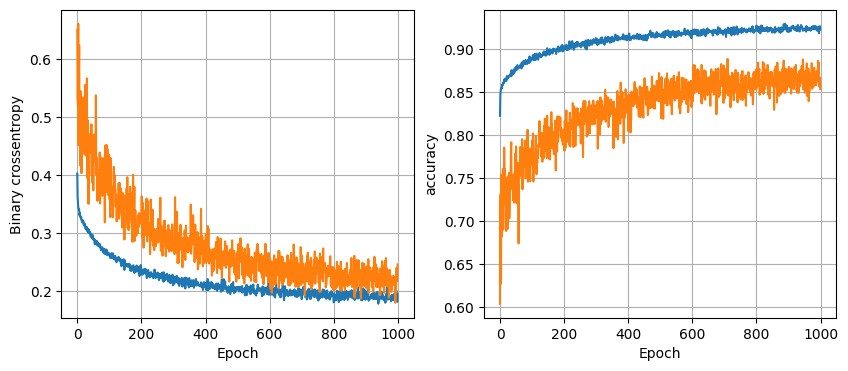

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8694 - loss: 0.4297
Val_loss: 0.44271302223205566 para num_node: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 64
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 128


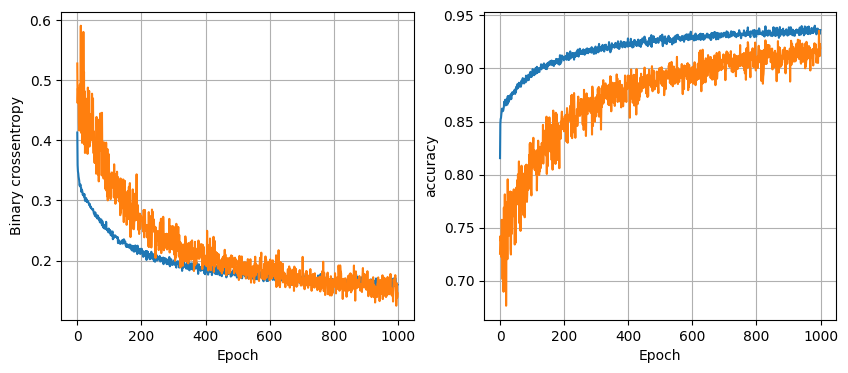

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8652 - loss: 0.4173
Val_loss: 0.4343453347682953 para num_node: 128, dropout_prob: 0.2, lr: 0.01, batch_size: 128
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.005, batch_size: 32


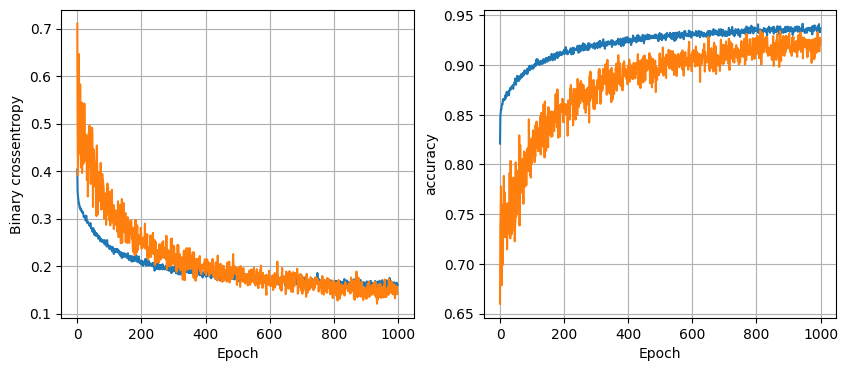

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8610 - loss: 0.5004
Val_loss: 0.4833502173423767 para num_node: 128, dropout_prob: 0.2, lr: 0.005, batch_size: 32
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.005, batch_size: 64


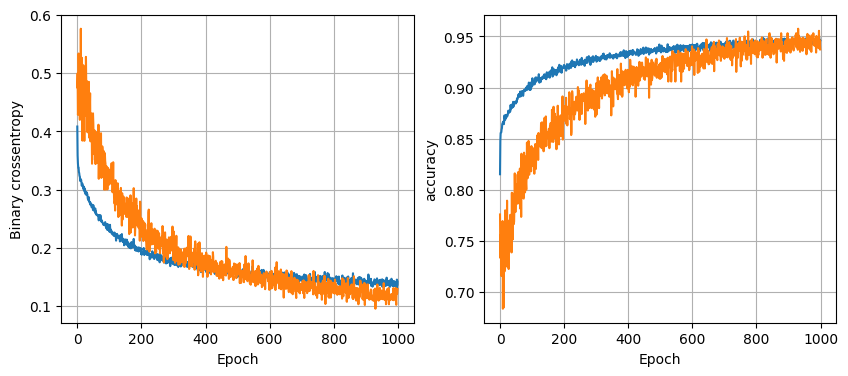

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.4139
Val_loss: 0.433188259601593 para num_node: 128, dropout_prob: 0.2, lr: 0.005, batch_size: 64
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.005, batch_size: 128


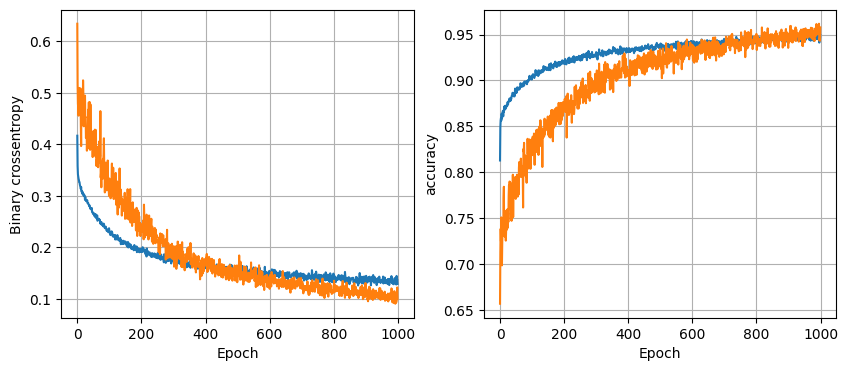

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8757 - loss: 0.3593
Val_loss: 0.3856388330459595 para num_node: 128, dropout_prob: 0.2, lr: 0.005, batch_size: 128
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.0001, batch_size: 32


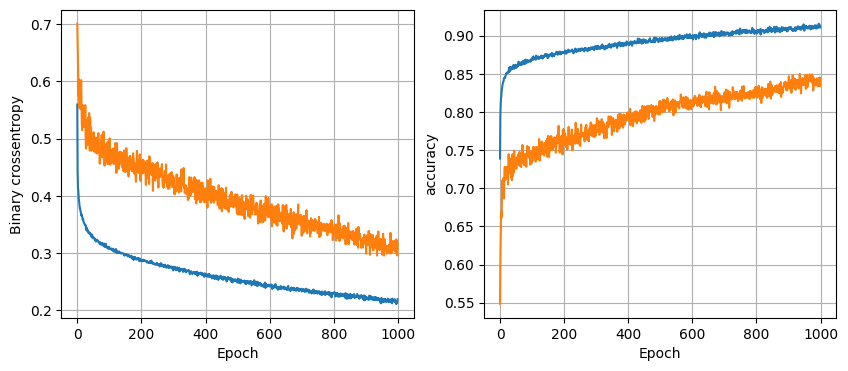

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8813 - loss: 0.2889
Val_loss: 0.3025584816932678 para num_node: 128, dropout_prob: 0.2, lr: 0.0001, batch_size: 32
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.0001, batch_size: 64


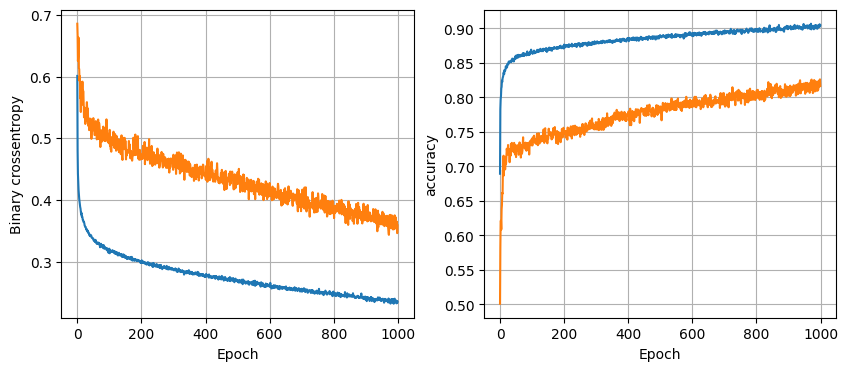

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8866 - loss: 0.2819
Val_loss: 0.29457294940948486 para num_node: 128, dropout_prob: 0.2, lr: 0.0001, batch_size: 64
Treinando com num_node: 128, dropout_prob: 0.2, lr: 0.0001, batch_size: 128


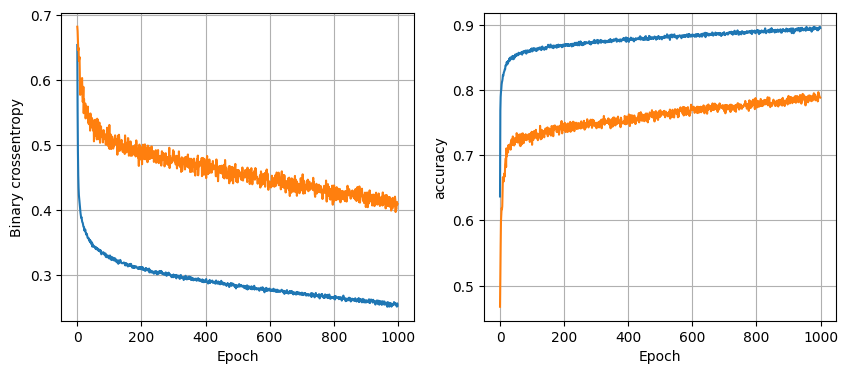

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8863 - loss: 0.2797
Val_loss: 0.2919011414051056 para num_node: 128, dropout_prob: 0.2, lr: 0.0001, batch_size: 128


In [28]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 1000

for num_node in [32, 64, 128]:
    for dropout_prob in [0, 0.2]:
        for lr in [1e-2, 5e-3, 1e-4]:
            for batch_size in [32, 64, 128]:
                try:
                    print(f'Treinando com num_node: {num_node}, dropout_prob: {dropout_prob}, lr: {lr}, batch_size: {batch_size}')

                    # Treina o modelo com os hiperparâmetros atuais
                    model, history = train_model(x_train, y_train, num_node, lr, batch_size, epochs)

                    # Plota o histórico de perda e acurácia
                    plot_history(history)

                    # Avalia no conjunto de validação
                    val_loss = model.evaluate(x_valid, y_valid)

                    print(f"Val_loss: {val_loss[0]} para num_node: {num_node}, dropout_prob: {dropout_prob}, lr: {lr}, batch_size: {batch_size}")

                    # Verifica se é o melhor modelo até agora
                    if val_loss[0] <= least_val_loss:
                        least_val_loss = val_loss[0]
                        least_loss_model = model
                        # Salva o modelo atual com menor perda de validação
                        model.save(f"best_model_{num_node}_{dropout_prob}_{lr}_{batch_size}.keras")

                except Exception as e:
                    print(f"Erro na combinação {num_node}, {dropout_prob}, {lr}, {batch_size}: {e}")
                    continue


In [29]:
if least_loss_model is not None:
  print(f'Least validation loss: {least_val_loss}')
else:
  print('something went wrong')

Least validation loss: 0.28747668862342834


In [30]:
y_pred=least_loss_model.predict(x_test)
y_pred= (y_pred> 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81      1334
         1.0       0.87      0.95      0.91      2470

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804



In [32]:
if least_val_loss == 0.2938183546066284:
  plot_history(history)
  print(f"Val_loss: {val_loss[0]} para num_node: {num_node},dropout_prob: {dropout_prob}, lr: {lr}, batch_size: {batch_size}")
